# Capstone Project: Predictive Modelling for COVID-19 in Public Health

### **Step 1: Project Setup**

## **Load Required Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

**Data Collection**
- **Data Source:** CORD-19 on Kaggle

**Load the Dataset**

In [2]:
covid_data1 = pd.read_csv("country_wise_latest.csv")

In [3]:
covid_data1.columns

Index(['Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered',
       'Confirmed last week', '1 week change', '1 week % increase',
       'WHO Region'],
      dtype='object')

In [4]:
covid_data2 = pd.read_csv("covid_19_clean_complete.csv")

In [5]:
covid_data2.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [6]:
covid_data3 = pd.read_csv("day_wise.csv")

In [7]:
covid_data3.columns

Index(['Date', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'New cases',
       'New deaths', 'New recovered', 'Deaths / 100 Cases',
       'Recovered / 100 Cases', 'Deaths / 100 Recovered', 'No. of countries'],
      dtype='object')

In [8]:
covid_data4 = pd.read_csv("full_grouped.csv")

In [9]:
covid_data4.columns

Index(['Date', 'Country/Region', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'New cases', 'New deaths', 'New recovered', 'WHO Region'],
      dtype='object')

In [10]:
covid_data5 = pd.read_csv("usa_county_wise.csv")

In [11]:
covid_data5.columns

Index(['UID', 'iso2', 'iso3', 'code3', 'FIPS', 'Admin2', 'Province_State',
       'Country_Region', 'Lat', 'Long_', 'Combined_Key', 'Date', 'Confirmed',
       'Deaths'],
      dtype='object')

In [12]:
covid_data6 = pd.read_csv("worldometer_data.csv")

In [13]:
covid_data6.columns

Index(['Country/Region', 'Continent', 'Population', 'TotalCases', 'NewCases',
       'TotalDeaths', 'NewDeaths', 'TotalRecovered', 'NewRecovered',
       'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop', 'Deaths/1M pop',
       'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [14]:
covid_data = pd.merge(covid_data2, covid_data6, on = 'Country/Region')

In [15]:
# Display dataset summary
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38164 entries, 0 to 38163
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Province/State    6580 non-null   object 
 1   Country/Region    38164 non-null  object 
 2   Lat               38164 non-null  float64
 3   Long              38164 non-null  float64
 4   Date              38164 non-null  object 
 5   Confirmed         38164 non-null  int64  
 6   Deaths            38164 non-null  int64  
 7   Recovered         38164 non-null  int64  
 8   Active            38164 non-null  int64  
 9   WHO Region_x      38164 non-null  object 
 10  Continent         38164 non-null  object 
 11  Population        38164 non-null  float64
 12  TotalCases        38164 non-null  int64  
 13  NewCases          564 non-null    float64
 14  TotalDeaths       35908 non-null  float64
 15  NewDeaths         376 non-null    float64
 16  TotalRecovered    37036 non-null  float6

In [16]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region_x,...,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region_y
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,...,NaN,25840.0,NaN,9758.0,31.0,946.0,33.0,90396.0,2317.0,EasternMediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,...,NaN,3155.0,NaN,2673.0,23.0,2091.0,65.0,38997.0,13553.0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,...,NaN,23238.0,NaN,9115.0,57.0,766.0,29.0,NaN,NaN,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,...,NaN,828.0,NaN,64.0,1.0,12216.0,673.0,3750.0,48526.0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,...,NaN,520.0,NaN,899.0,20.0,45.0,2.0,64747.0,1965.0,Africa


**Check for Missing Values and Duplicates**

In [17]:
# Check missing values
covid_data.isna().sum()

Province/State      31584
Country/Region          0
Lat                     0
Long                    0
Date                    0
Confirmed               0
Deaths                  0
Recovered               0
Active                  0
WHO Region_x            0
Continent               0
Population              0
TotalCases              0
NewCases            37600
TotalDeaths          2256
NewDeaths           37788
TotalRecovered       1128
NewRecovered        37788
ActiveCases          1128
Serious,Critical    11844
Tot Cases/1M pop        0
Deaths/1M pop        2256
TotalTests           2632
Tests/1M pop         2632
WHO Region_y            0
dtype: int64

In [18]:
# Drop duplicates
covid_data = covid_data.drop_duplicates()

In [19]:
# Address missing values
covid_data.fillna(0, inplace=True)

In [20]:
covid_data['Province/State'].replace(0, 'Unknown' , inplace = True)

In [21]:
covid_data.isnull().sum()

Province/State      0
Country/Region      0
Lat                 0
Long                0
Date                0
Confirmed           0
Deaths              0
Recovered           0
Active              0
WHO Region_x        0
Continent           0
Population          0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region_y        0
dtype: int64

In [22]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region_x,...,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region_y
0,Unknown,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean,...,0.0,25840.0,0.0,9758.0,31.0,946.0,33.0,90396.0,2317.0,EasternMediterranean
1,Unknown,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,...,0.0,3155.0,0.0,2673.0,23.0,2091.0,65.0,38997.0,13553.0,Europe
2,Unknown,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,...,0.0,23238.0,0.0,9115.0,57.0,766.0,29.0,0.0,0.0,Africa
3,Unknown,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,...,0.0,828.0,0.0,64.0,1.0,12216.0,673.0,3750.0,48526.0,Europe
4,Unknown,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,...,0.0,520.0,0.0,899.0,20.0,45.0,2.0,64747.0,1965.0,Africa


In [23]:
# Check if all values match between the two columns
(covid_data['WHO Region_x'] == covid_data['WHO Region_y']).all()

np.False_

In [24]:
# Combine columns by filling missing values in _x with those in _y
covid_data['WHO Region'] = covid_data['WHO Region_x'].combine_first(covid_data['WHO Region_y'])
covid_data.drop(['WHO Region_x', 'WHO Region_y'], axis=1, inplace=True)

In [25]:
covid_data['WHO Region'].value_counts()

WHO Region
Europe                   12596
Africa                    8272
Americas                  8272
Eastern Mediterranean     3760
Western Pacific           3572
South-East Asia           1692
Name: count, dtype: int64

In [26]:
covid_data.isnull().sum()

Province/State      0
Country/Region      0
Lat                 0
Long                0
Date                0
Confirmed           0
Deaths              0
Recovered           0
Active              0
Continent           0
Population          0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
WHO Region          0
dtype: int64

In [27]:
covid_data.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'Continent', 'Population',
       'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered',
       'NewRecovered', 'ActiveCases', 'Serious,Critical', 'Tot Cases/1M pop',
       'Deaths/1M pop', 'TotalTests', 'Tests/1M pop', 'WHO Region'],
      dtype='object')

In [28]:
covid_data.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,Continent,...,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,WHO Region
0,Unknown,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Asia,...,0.0,25840.0,0.0,9758.0,31.0,946.0,33.0,90396.0,2317.0,Eastern Mediterranean
1,Unknown,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe,...,0.0,3155.0,0.0,2673.0,23.0,2091.0,65.0,38997.0,13553.0,Europe
2,Unknown,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa,...,0.0,23238.0,0.0,9115.0,57.0,766.0,29.0,0.0,0.0,Africa
3,Unknown,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe,...,0.0,828.0,0.0,64.0,1.0,12216.0,673.0,3750.0,48526.0,Europe
4,Unknown,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa,...,0.0,520.0,0.0,899.0,20.0,45.0,2.0,64747.0,1965.0,Africa


In [29]:
covid_data.shape

(38164, 24)

**Set Date Column as Index**

In [30]:
# Convert to datetime and set index
covid_data['Date'] = pd.to_datetime(covid_data['Date'])
covid_data.set_index('Date', inplace=True)

In [31]:
# Check for duplicate dates
duplicates = covid_data.index[covid_data.index.duplicated()]
print(f"Duplicate dates: {duplicates}")

Duplicate dates: DatetimeIndex(['2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22', '2020-01-22', '2020-01-22',
               '2020-01-22', '2020-01-22',
               ...
               '2020-07-27', '2020-07-27', '2020-07-27', '2020-07-27',
               '2020-07-27', '2020-07-27', '2020-07-27', '2020-07-27',
               '2020-07-27', '2020-07-27'],
              dtype='datetime64[ns]', name='Date', length=37976, freq=None)


In [32]:
# Group by Date and Country/Region, summing numeric columns
aggregated_data = covid_data.groupby(['Date', 'Country/Region']).sum(numeric_only=True).reset_index()

# Display the cleaned dataset
aggregated_data.head()

,Date,Country/Region,Lat,Long,Confirmed,Deaths,Recovered,Active,Population,TotalCases,...,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
0,2020-01-22,Afghanistan,33.93911,67.709953,0,0,0,0,39009447.0,36896,...,1298.0,0.0,25840.0,0.0,9758.0,31.0,946.0,33.0,90396.0,2317.0
1,2020-01-22,Albania,41.15330,20.168300,0,0,0,0,2877470.0,6016,...,188.0,0.0,3155.0,0.0,2673.0,23.0,2091.0,65.0,38997.0,13553.0
2,2020-01-22,Algeria,28.03390,1.659600,0,0,0,0,43926079.0,33626,...,1273.0,0.0,23238.0,0.0,9115.0,57.0,766.0,29.0,0.0,0.0
3,2020-01-22,Andorra,42.50630,1.521800,0,0,0,0,77278.0,944,...,52.0,0.0,828.0,0.0,64.0,1.0,12216.0,673.0,3750.0,48526.0
4,2020-01-22,Angola,-11.20270,17.873900,0,0,0,0,32956300.0,1483,...,64.0,0.0,520.0,0.0,899.0,20.0,45.0,2.0,64747.0,1965.0


**Verify Duplicate Resolution**

In [33]:
# Check for duplicate dates
duplicates = aggregated_data.duplicated(subset='Date', keep=False)
print(f"Any remaining duplicate dates? {duplicates.any()}")

Any remaining duplicate dates? True


In [34]:
# Find rows with duplicate dates
duplicate_rows = aggregated_data[aggregated_data.duplicated(subset='Date', keep=False)]

# Display the duplicate rows
print(duplicate_rows)

            Date  Country/Region        Lat        Long  Confirmed  Deaths  \
0     2020-01-22     Afghanistan  33.939110   67.709953          0       0   
1     2020-01-22         Albania  41.153300   20.168300          0       0   
2     2020-01-22         Algeria  28.033900    1.659600          0       0   
3     2020-01-22         Andorra  42.506300    1.521800          0       0   
4     2020-01-22          Angola -11.202700   17.873900          0       0   
...          ...             ...        ...         ...        ...     ...   
32143 2020-07-27         Vietnam  14.058324  108.277199        431       0   
32144 2020-07-27  Western Sahara  24.215500  -12.885800         10       1   
32145 2020-07-27           Yemen  15.552727   48.516388       1691     483   
32146 2020-07-27          Zambia -13.133897   27.849332       4552     140   
32147 2020-07-27        Zimbabwe -19.015438   29.154857       2704      36   

       Recovered  Active  Population  TotalCases  ...  TotalDea

**Aggregate Numeric Columns by Date**

In [35]:
# Ensure 'Date' is a column in the dataset
aggregated_data['Date'] = pd.to_datetime(aggregated_data['Date'])  # Ensure 'Date' is in datetime format

In [36]:
# Aggregate numeric columns by summing them for each unique Date
resolved_data = aggregated_data.groupby('Date').sum(numeric_only=True).reset_index()

In [37]:
# Display the resulting dataset
print(resolved_data.head())
print(f"Dataset shape after aggregation: {resolved_data.shape}")

        Date          Lat         Long  Confirmed  Deaths  Recovered  Active  \
0 2020-01-22  3950.071283  2461.277163          4       0          0       4   
1 2020-01-23  3950.071283  2461.277163          8       0          0       8   
2 2020-01-24  3950.071283  2461.277163         14       0          0      14   
3 2020-01-25  3950.071283  2461.277163         21       0          0      21   
4 2020-01-26  3950.071283  2461.277163         31       0          3      28   

     Population  TotalCases  NewCases  TotalDeaths  NewDeaths  TotalRecovered  \
0  6.948048e+09    17269596    7902.0     924911.0      899.0      11424796.0   
1  6.948048e+09    17269596    7902.0     924911.0      899.0      11424796.0   
2  6.948048e+09    17269596    7902.0     924911.0      899.0      11424796.0   
3  6.948048e+09    17269596    7902.0     924911.0      899.0      11424796.0   
4  6.948048e+09    17269596    7902.0     924911.0      899.0      11424796.0   

   NewRecovered  ActiveCases  Se

**Check for Remaining Duplicate Dates**

In [38]:
# Check for duplicate dates
duplicates = resolved_data.duplicated(subset='Date', keep=False)
print(f"Any remaining duplicate dates? {duplicates.any()}")

Any remaining duplicate dates? False


**Set 'Date' as the Index**

In [39]:
# Set 'Date' as the index
resolved_data.set_index('Date', inplace=True)

In [40]:
# Ensure daily frequency
resolved_data = resolved_data.asfreq('D')

In [41]:
# Display the time-series dataset
print(resolved_data.head())

                    Lat         Long  Confirmed  Deaths  Recovered  Active  \
Date                                                                         
2020-01-22  3950.071283  2461.277163          4       0          0       4   
2020-01-23  3950.071283  2461.277163          8       0          0       8   
2020-01-24  3950.071283  2461.277163         14       0          0      14   
2020-01-25  3950.071283  2461.277163         21       0          0      21   
2020-01-26  3950.071283  2461.277163         31       0          3      28   

              Population  TotalCases  NewCases  TotalDeaths  NewDeaths  \
Date                                                                     
2020-01-22  6.948048e+09    17269596    7902.0     924911.0      899.0   
2020-01-23  6.948048e+09    17269596    7902.0     924911.0      899.0   
2020-01-24  6.948048e+09    17269596    7902.0     924911.0      899.0   
2020-01-25  6.948048e+09    17269596    7902.0     924911.0      899.0   
2020-01-2

In [42]:
# Fill missing values with zeros
resolved_data.fillna(0, inplace=True)

In [43]:
# Verify no missing values
print(resolved_data.isna().sum())

Lat                 0
Long                0
Confirmed           0
Deaths              0
Recovered           0
Active              0
Population          0
TotalCases          0
NewCases            0
TotalDeaths         0
NewDeaths           0
TotalRecovered      0
NewRecovered        0
ActiveCases         0
Serious,Critical    0
Tot Cases/1M pop    0
Deaths/1M pop       0
TotalTests          0
Tests/1M pop        0
dtype: int64


In [44]:
# Verify the Final Dataset
resolved_data.info()
resolved_data.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 188 entries, 2020-01-22 to 2020-07-27
Freq: D
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Lat               188 non-null    float64
 1   Long              188 non-null    float64
 2   Confirmed         188 non-null    int64  
 3   Deaths            188 non-null    int64  
 4   Recovered         188 non-null    int64  
 5   Active            188 non-null    int64  
 6   Population        188 non-null    float64
 7   TotalCases        188 non-null    int64  
 8   NewCases          188 non-null    float64
 9   TotalDeaths       188 non-null    float64
 10  NewDeaths         188 non-null    float64
 11  TotalRecovered    188 non-null    float64
 12  NewRecovered      188 non-null    float64
 13  ActiveCases       188 non-null    float64
 14  Serious,Critical  188 non-null    float64
 15  Tot Cases/1M pop  188 non-null    float64
 16  Deaths/1M pop    

,Lat,Long,Confirmed,Deaths,Recovered,Active,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
Date,,,,,,,,,,,,,,,,,,,
2020-01-22,3950.071283,2461.277163,4,0,0,4,6.948048e+09,17269596,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0
2020-01-23,3950.071283,2461.277163,8,0,0,8,6.948048e+09,17269596,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0
2020-01-24,3950.071283,2461.277163,14,0,0,14,6.948048e+09,17269596,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0
2020-01-25,3950.071283,2461.277163,21,0,0,21,6.948048e+09,17269596,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0
2020-01-26,3950.071283,2461.277163,31,0,3,28,6.948048e+09,17269596,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0


In [45]:
print(resolved_data.dtypes)  # Check if 'Date' is indeed the index

Lat                 float64
Long                float64
Confirmed             int64
Deaths                int64
Recovered             int64
Active                int64
Population          float64
TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
dtype: object


In [46]:
# Recheck the frequency of the index
print(resolved_data.index.freq)

<Day>


In [47]:
print(covid_data.index.freq)

None


In [48]:
# Rename the variable:
covid_data = resolved_data.copy()

In [49]:
print(covid_data.index.freq) 

<Day>


In [50]:
# Display first few rows to confirm the data after preprocessing
covid_data.head()

,Lat,Long,Confirmed,Deaths,Recovered,Active,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
Date,,,,,,,,,,,,,,,,,,,
2020-01-22,3950.071283,2461.277163,4,0,0,4,6.948048e+09,17269596,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0
2020-01-23,3950.071283,2461.277163,8,0,0,8,6.948048e+09,17269596,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0
2020-01-24,3950.071283,2461.277163,14,0,0,14,6.948048e+09,17269596,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0
2020-01-25,3950.071283,2461.277163,21,0,0,21,6.948048e+09,17269596,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0
2020-01-26,3950.071283,2461.277163,31,0,3,28,6.948048e+09,17269596,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0


In [51]:
covid_data.columns

Index(['Lat', 'Long', 'Confirmed', 'Deaths', 'Recovered', 'Active',
       'Population', 'TotalCases', 'NewCases', 'TotalDeaths', 'NewDeaths',
       'TotalRecovered', 'NewRecovered', 'ActiveCases', 'Serious,Critical',
       'Tot Cases/1M pop', 'Deaths/1M pop', 'TotalTests', 'Tests/1M pop'],
      dtype='object')

In [52]:
covid_data.shape

(188, 19)

### **Step 2: Exploratory Data Analysis (EDA)**

**Descriptive Statistics**

In [53]:
# Descriptive statistics
covid_data.describe()

,Lat,Long,Confirmed,Deaths,Recovered,Active,Population,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop
count,1.880000e+02,1.880000e+02,1.880000e+02,188.000000,1.880000e+02,1.880000e+02,1.880000e+02,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.0,188.00,188.0,188.0
mean,3.950071e+03,2.461277e+03,2.957841e+06,146892.468085,1.681043e+06,1.129905e+06,6.948048e+09,17269596.0,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0
std,4.559616e-13,4.559616e-13,3.372418e+06,143665.387834,2.209624e+06,1.058698e+06,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0
min,3.950071e+03,2.461277e+03,4.000000e+00,0.000000,0.000000e+00,4.000000e+00,6.948048e+09,17269596.0,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0
25%,3.950071e+03,2.461277e+03,2.269800e+04,740.000000,3.380750e+03,1.857725e+04,6.948048e+09,17269596.0,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0
50%,3.950071e+03,2.461277e+03,1.663129e+06,122183.500000,5.960915e+05,9.448540e+05,6.948048e+09,17269596.0,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0
75%,3.950071e+03,2.461277e+03,4.995496e+06,258021.000000,2.761958e+06,1.975517e+06,6.948048e+09,17269596.0,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0
max,3.950071e+03,2.461277e+03,1.167701e+07,454184.000000,7.969324e+06,3.253498e+06,6.948048e+09,17269596.0,7902.0,924911.0,899.0,11424796.0,5076.0,4314342.0,75937.0,616810.0,23847.98,303474174.0,14490193.0


In [54]:
# Check data types to ensure correct formats, especially for Date
print(covid_data.dtypes)

Lat                 float64
Long                float64
Confirmed             int64
Deaths                int64
Recovered             int64
Active                int64
Population          float64
TotalCases            int64
NewCases            float64
TotalDeaths         float64
NewDeaths           float64
TotalRecovered      float64
NewRecovered        float64
ActiveCases         float64
Serious,Critical    float64
Tot Cases/1M pop    float64
Deaths/1M pop       float64
TotalTests          float64
Tests/1M pop        float64
dtype: object


**Check if Date is the index:**

In [55]:
print(covid_data.index)

DatetimeIndex(['2020-01-22', '2020-01-23', '2020-01-24', '2020-01-25',
               '2020-01-26', '2020-01-27', '2020-01-28', '2020-01-29',
               '2020-01-30', '2020-01-31',
               ...
               '2020-07-18', '2020-07-19', '2020-07-20', '2020-07-21',
               '2020-07-22', '2020-07-23', '2020-07-24', '2020-07-25',
               '2020-07-26', '2020-07-27'],
              dtype='datetime64[ns]', name='Date', length=188, freq='D')


**Verify the frequency of the Date index:**

In [56]:
print(covid_data.index.freq)

<Day>


In [57]:
covid_data = covid_data.asfreq('D')

**Visualize the Data**

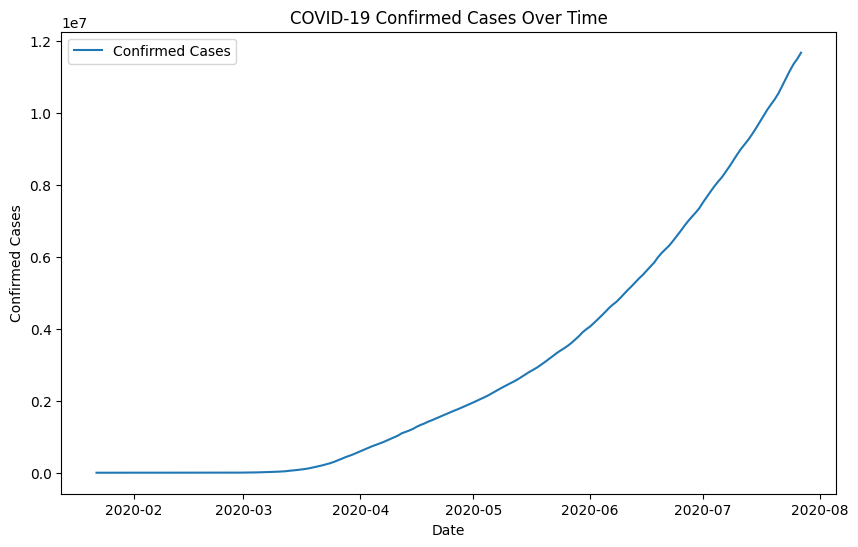

In [58]:
# Confirmed cases over time
plt.figure(figsize=(10, 6))
plt.plot(covid_data['Confirmed'], label='Confirmed Cases')
plt.title('COVID-19 Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.savefig('confirmed_cases_plot.png', dpi=300)
plt.show()

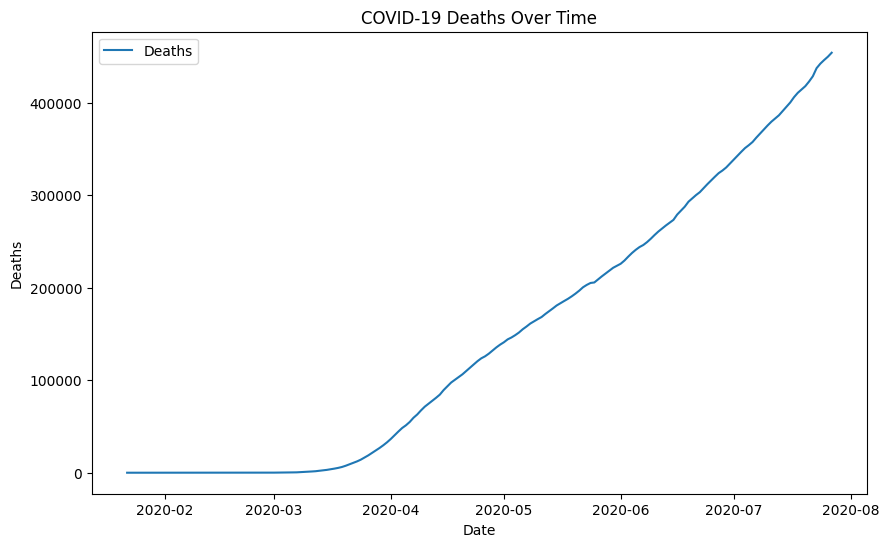

In [59]:
# Confirmed deaths over time
plt.figure(figsize=(10, 6))
plt.plot(covid_data['Deaths'], label='Deaths')
plt.title('COVID-19 Deaths Over Time')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.legend()
plt.savefig('deaths_plot.png', dpi=300)
plt.show()

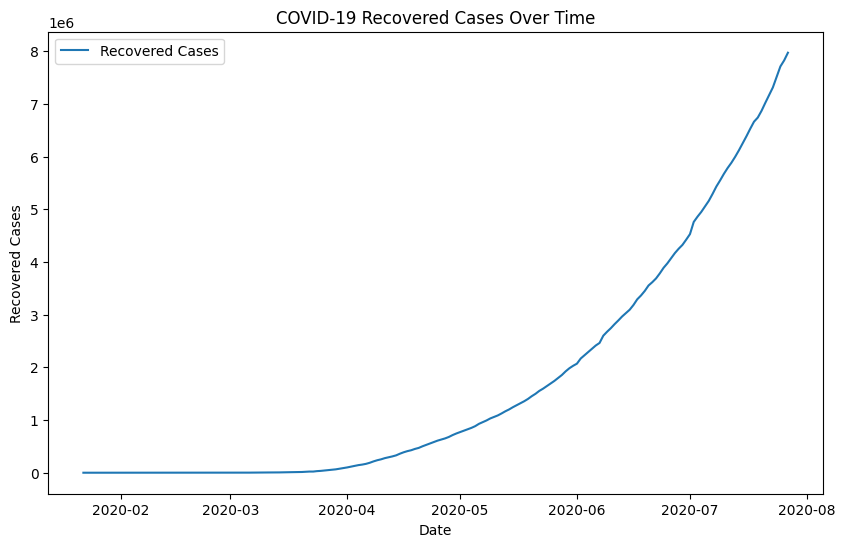

In [60]:
# Recovered cases over time
plt.figure(figsize=(10, 6))
plt.plot(covid_data['Recovered'], label='Recovered Cases')
plt.title('COVID-19 Recovered Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Recovered Cases')
plt.legend()
plt.savefig('recovered_cases_plot.png', dpi=300)
plt.show()

**Distribution of Features (Histogram)**

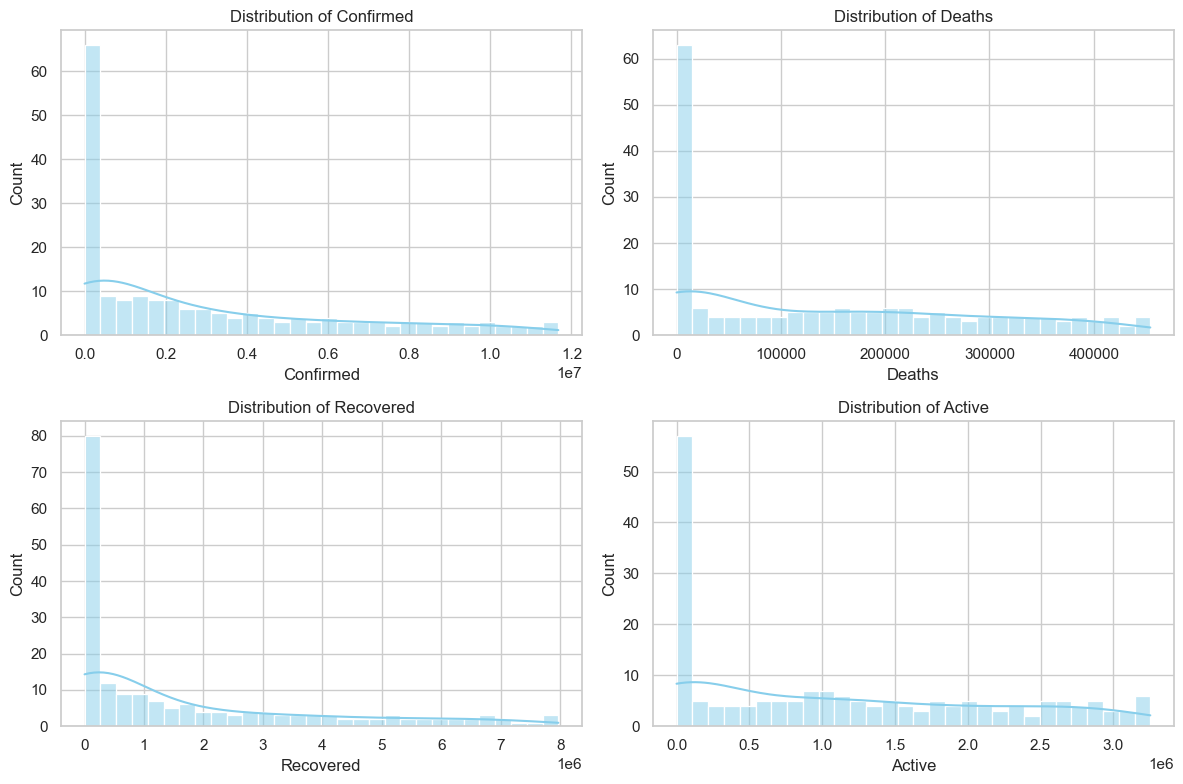

In [61]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Plot histogram for 'Confirmed', 'Deaths', and 'Recovered'
plt.figure(figsize=(12, 8))
features = ['Confirmed', 'Deaths', 'Recovered', 'Active']

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(covid_data[feature], kde=True, color='skyblue', bins=30)
    plt.title(f'Distribution of {feature}')

# Save the plot in high resolution
plt.tight_layout()
plt.savefig("eda_distribution_plots.png", dpi=300)
plt.show()

 **Boxplots to Identify Outliers**

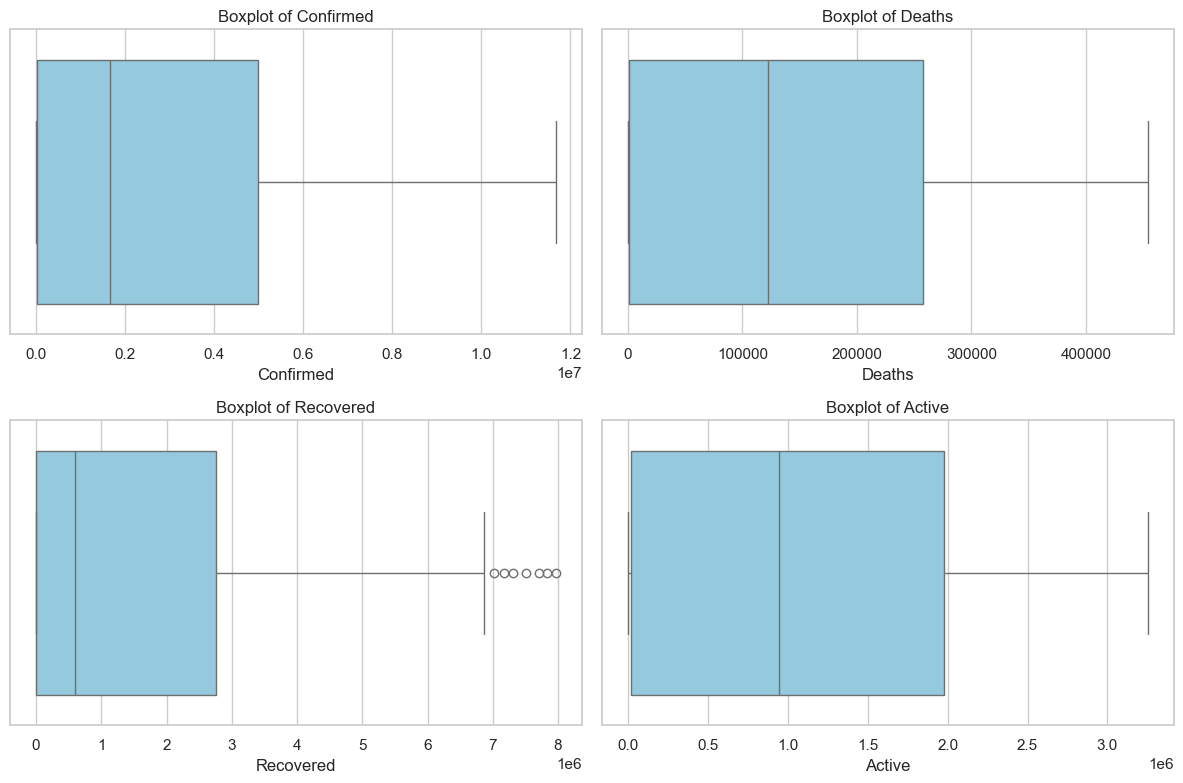

In [62]:
# Boxplot for 'Confirmed', 'Deaths', 'Recovered', and 'Active'
plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=covid_data[feature], color='skyblue')
    plt.title(f'Boxplot of {feature}')

# Save boxplot image
plt.tight_layout()
plt.savefig("eda_boxplots.png", dpi=300)
plt.show()

**Correlation Matrix**

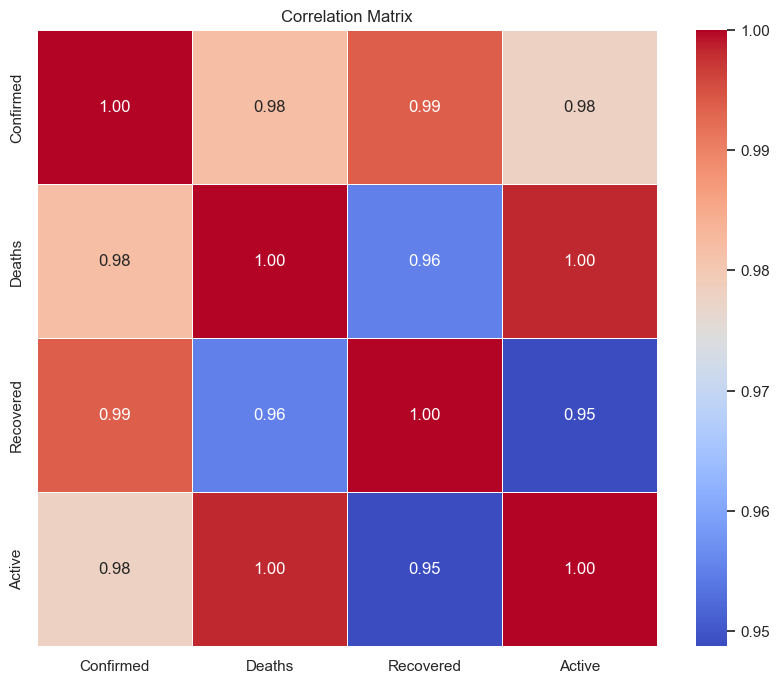

In [63]:
# Calculate correlation matrix
correlation_matrix = covid_data[features].corr()

# Plot heatmap for correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")

# Save the heatmap
plt.savefig("eda_correlation_matrix.png", dpi=300)
plt.show()

**Time Series Exploration**

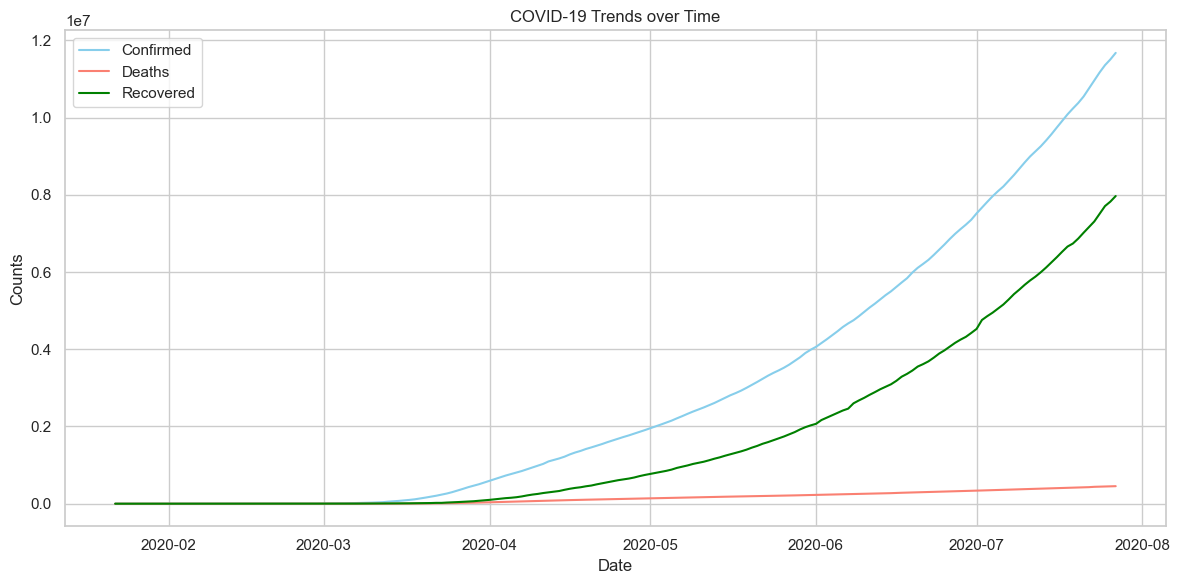

In [64]:
# Plot time series data for key variables: Confirmed, Deaths, and Recovered
plt.figure(figsize=(12, 6))

# Use index for x-axis, no need to reference 'Date' directly
plt.plot(covid_data.index, covid_data['Confirmed'], label='Confirmed', color='skyblue')
plt.plot(covid_data.index, covid_data['Deaths'], label='Deaths', color='salmon')
plt.plot(covid_data.index, covid_data['Recovered'], label='Recovered', color='green')

plt.xlabel('Date')
plt.ylabel('Counts')
plt.title('COVID-19 Trends over Time')
plt.legend()

# Save plot
plt.tight_layout()
plt.savefig("time_series_trends.png", dpi=300)
plt.show()

### **Step 3: Feature Engineering**

**Time-Based Features**

In [65]:
# Extract time-based features from the index (Date)
covid_data['Year'] = covid_data.index.year
covid_data['Month'] = covid_data.index.month
covid_data['DayOfWeek'] = covid_data.index.dayofweek
covid_data['DayOfYear'] = covid_data.index.dayofyear

# Display the first few rows to confirm the new features
print(covid_data[['Year', 'Month', 'DayOfWeek', 'DayOfYear']].head())

            Year  Month  DayOfWeek  DayOfYear
Date                                         
2020-01-22  2020      1          2         22
2020-01-23  2020      1          3         23
2020-01-24  2020      1          4         24
2020-01-25  2020      1          5         25
2020-01-26  2020      1          6         26


**Lag Features (for Forecasting)**

In [66]:
# Create lag features for Confirmed, Deaths, and Recovered
covid_data['Confirmed_Lag1'] = covid_data['Confirmed'].shift(1)
covid_data['Deaths_Lag1'] = covid_data['Deaths'].shift(1)
covid_data['Recovered_Lag1'] = covid_data['Recovered'].shift(1)

In [67]:
# Drop rows with NaN values due to lagging (first row will have NaN in lag features)
covid_data.dropna(subset=['Confirmed_Lag1', 'Deaths_Lag1', 'Recovered_Lag1'], inplace=True)

In [68]:
# Display the first few rows to check
print(covid_data[['Confirmed', 'Confirmed_Lag1', 'Deaths', 'Deaths_Lag1', 'Recovered', 'Recovered_Lag1']].head())

            Confirmed  Confirmed_Lag1  Deaths  Deaths_Lag1  Recovered  \
Date                                                                    
2020-01-23          8             4.0       0          0.0          0   
2020-01-24         14             8.0       0          0.0          0   
2020-01-25         21            14.0       0          0.0          0   
2020-01-26         31            21.0       0          0.0          3   
2020-01-27         36            31.0       0          0.0          3   

            Recovered_Lag1  
Date                        
2020-01-23             0.0  
2020-01-24             0.0  
2020-01-25             0.0  
2020-01-26             0.0  
2020-01-27             3.0  


### **Step 4: Model Building**

- **ARIMA Model (for time series forecasting):** Use the Confirmed feature for predicting future values.

In [69]:
#  Import ARIMA from statsmodels:
from statsmodels.tsa.arima.model import ARIMA

**Define ARIMA Model:**

In [70]:
# Fit ARIMA model to 'Confirmed' data
model = ARIMA(covid_data['Confirmed'], order=(5, 1, 0))  # Example: p=5, d=1, q=0
model_fit = model.fit()

**Model Diagnostics:**

In [71]:
# Print model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:              Confirmed   No. Observations:                  187
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1959.045
Date:                Sun, 24 Nov 2024   AIC                           3930.089
Time:                        07:03:46   BIC                           3949.444
Sample:                    01-23-2020   HQIC                          3937.932
                         - 07-27-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8685      0.053     16.531      0.000       0.766       0.971
ar.L2         -0.2257      0.079     -2.861      0.004      -0.380      -0.071
ar.L3          0.1090      0.089      1.219      0.2

**Plotting Residuals (Optional but recommended):**

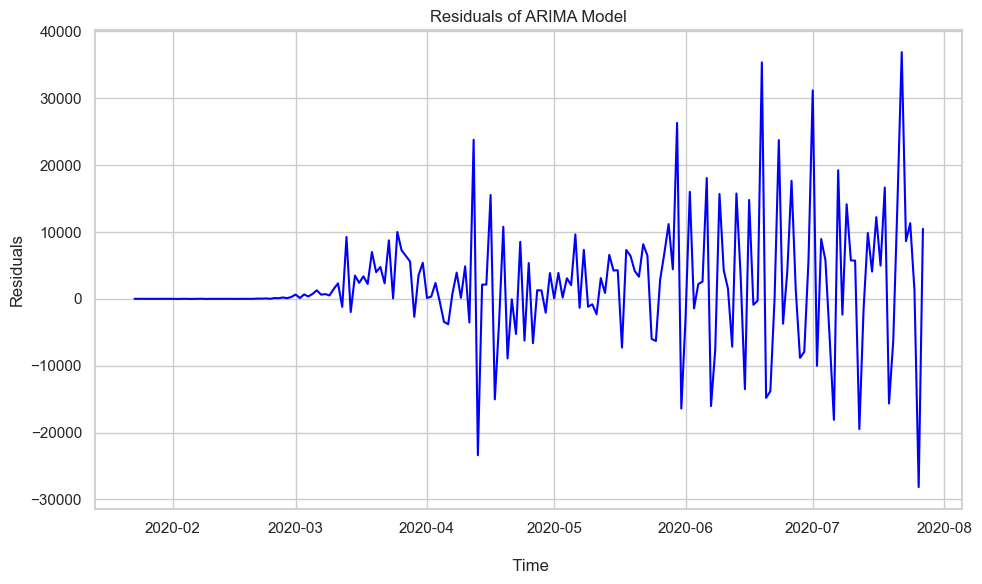

In [72]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals, color='blue')
plt.title('Residuals of ARIMA Model')
plt.xlabel('\n Time')
plt.ylabel('Residuals')

# Save the plot
plt.tight_layout()  # Adjust layout for better spacing
plt.savefig("residuals_arima.png", dpi=300)  # Save the plot as a PNG file with high resolution

# Display the plot
plt.show()

2020-07-28    1.186525e+07
2020-07-29    1.205941e+07
2020-07-30    1.225499e+07
2020-07-31    1.243575e+07
2020-08-01    1.260998e+07
2020-08-02    1.278786e+07
2020-08-03    1.297076e+07
2020-08-04    1.315868e+07
2020-08-05    1.334561e+07
2020-08-06    1.352831e+07
2020-08-07    1.370885e+07
2020-08-08    1.388962e+07
2020-08-09    1.407253e+07
2020-08-10    1.425715e+07
2020-08-11    1.444151e+07
2020-08-12    1.462467e+07
2020-08-13    1.480689e+07
2020-08-14    1.498910e+07
2020-08-15    1.517205e+07
2020-08-16    1.535556e+07
2020-08-17    1.553908e+07
2020-08-18    1.572222e+07
2020-08-19    1.590500e+07
2020-08-20    1.608775e+07
2020-08-21    1.627073e+07
2020-08-22    1.645392e+07
2020-08-23    1.663713e+07
2020-08-24    1.682022e+07
2020-08-25    1.700319e+07
2020-08-26    1.718613e+07
Freq: D, Name: predicted_mean, dtype: float64


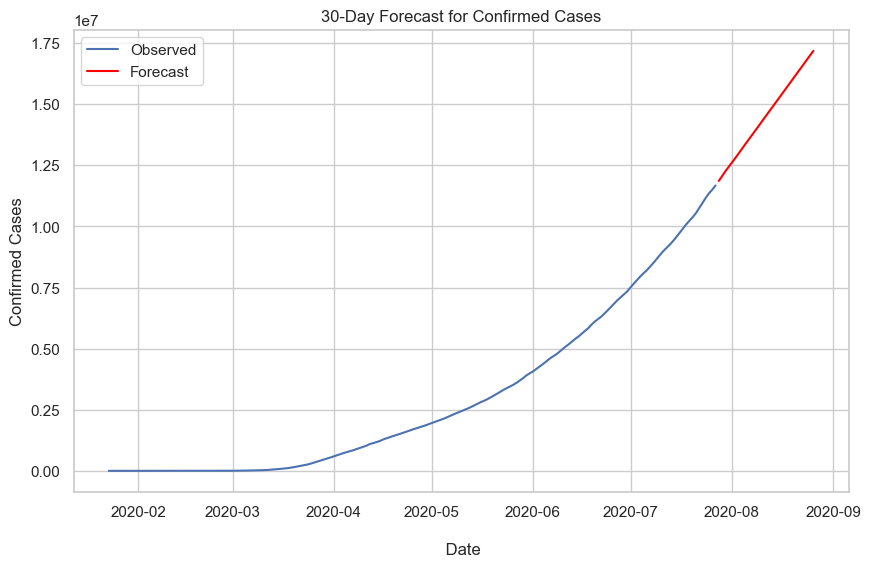

In [73]:
# Forecast next 30 days
forecast = model_fit.forecast(steps=30)
print(forecast)

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(covid_data['Confirmed'], label='Observed')
plt.plot(forecast, label='Forecast', color='red')
plt.title('30-Day Forecast for Confirmed Cases')
plt.xlabel('\n Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.savefig('forecast_plot.png', dpi=300)
plt.show()

In [74]:
forecast = model_fit.forecast(steps=7)
print(forecast)

2020-07-28    1.186525e+07
2020-07-29    1.205941e+07
2020-07-30    1.225499e+07
2020-07-31    1.243575e+07
2020-08-01    1.260998e+07
2020-08-02    1.278786e+07
2020-08-03    1.297076e+07
Freq: D, Name: predicted_mean, dtype: float64


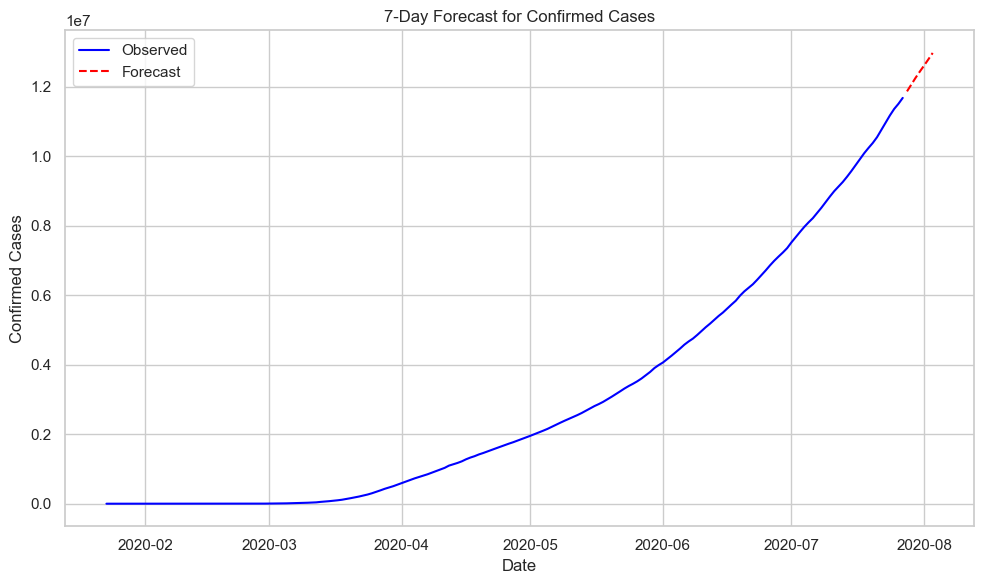

In [75]:
forecast_index = pd.date_range(start=covid_data.index[-1] + pd.Timedelta(days=1), periods=7, freq='D')
forecast_series = pd.Series(forecast.values, index=forecast_index)

plt.figure(figsize=(10, 6))
plt.plot(covid_data['Confirmed'], label='Observed', color='blue')
plt.plot(forecast_series, label='Forecast', color='red', linestyle='--')
plt.title('7-Day Forecast for Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.tight_layout()
plt.savefig('7_day_forecast_plot.png', dpi=300)  # Save the plot
plt.show()

### **Step 5: Model Evaluation and Tuning**

- **Evaluate Model Performance**

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Use in-sample predictions (fitted values) to calculate errors
fitted_values = model_fit.fittedvalues
observed_values = covid_data['Confirmed']

In [77]:
# Calculate metrics
mae = mean_absolute_error(observed_values, fitted_values)
mse = mean_squared_error(observed_values, fitted_values)
rmse = np.sqrt(mse)

In [78]:
# Display results
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 5651.07
Mean Squared Error (MSE): 81518419.84
Root Mean Squared Error (RMSE): 9028.76


- **Visualize Residuals**

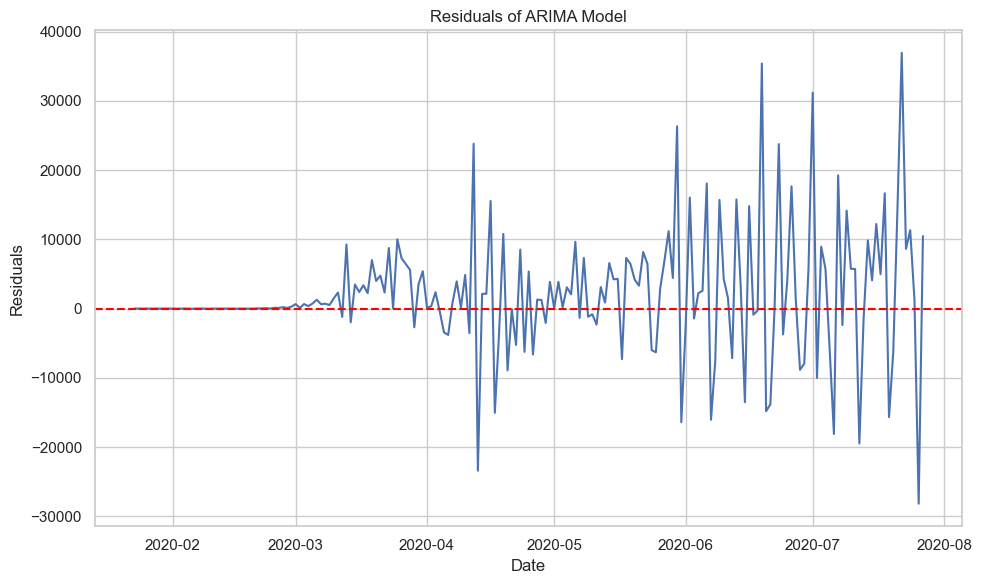

In [79]:
# Plot residuals
residuals = model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.tight_layout()
plt.savefig('residuals_plot.png', dpi=300)
plt.show()

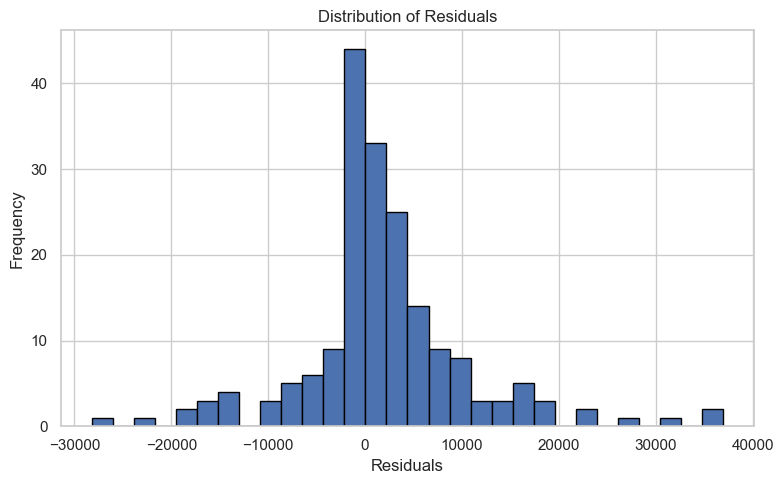

In [80]:
# Plot histogram of residuals
plt.figure(figsize=(8, 5))
plt.hist(residuals, bins=30, edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('residual_histogram.png', dpi=300)
plt.show()

- **Tune ARIMA Model Parameters (p, d, q)**

In [81]:
import itertools

In [82]:
# Define range of parameters
p = range(0, 6)  # Try values from 0 to 5
d = range(0, 3)  # Try values from 0 to 2
q = range(0, 6)  # Try values from 0 to 5

In [83]:
# Generate all possible combinations of p, d, q
pdq = list(itertools.product(p, d, q))

best_aic = float('inf')  # Initialize best AIC score
best_pdq = None          # Initialize best (p, d, q)

In [84]:
# Grid search for best parameters
for param in pdq:
    try:
        model = ARIMA(covid_data['Confirmed'], order=param)
        model_fit = model.fit()
        aic = model_fit.aic  # Evaluate using AIC (lower is better)
        if aic < best_aic:
            best_aic = aic
            best_pdq = param
    except:
        continue

print(f"Best ARIMA parameters: {best_pdq} with AIC: {best_aic:.2f}")

Best ARIMA parameters: (3, 0, 0) with AIC: 10.00


- **Refit the Model with Optimized Parameters**

In [85]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Refit ARIMA model with the best parameters
best_pdq = (3, 0, 0)  # Replace with the best parameters found
best_model = ARIMA(covid_data['Confirmed'], order=best_pdq)
best_model_fit = best_model.fit()

# Use fitted values to evaluate the model
fitted_values = best_model_fit.fittedvalues
observed_values

Date
2020-01-23           8
2020-01-24          14
2020-01-25          21
2020-01-26          31
2020-01-27          36
                ...   
2020-07-23    10966546
2020-07-24    11171638
2020-07-25    11358692
2020-07-26    11506732
2020-07-27    11677006
Freq: D, Name: Confirmed, Length: 187, dtype: int64

**Cross-Validation**

In [86]:
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Initialize time series split (5 folds)
tscv = TimeSeriesSplit(n_splits=5)

In [87]:
# Perform cross-validation
fold = 1
for train_index, test_index in tscv.split(covid_data):
    # Split data into training and testing sets
    train, test = covid_data.iloc[train_index], covid_data.iloc[test_index]

    # Fit ARIMA model to the training set
    model = ARIMA(train['Confirmed'], order=best_pdq)
    model_fit = model.fit()

    # Forecast the test set
    forecast = model_fit.forecast(steps=len(test))

    # Evaluate using MAE
    mae = mean_absolute_error(test['Confirmed'], forecast)
    print(f"Fold {fold} MAE: {mae:.2f}")
    fold += 1

Fold 1 MAE: 69300.12
Fold 2 MAE: 201206.27
Fold 3 MAE: 300802.78
Fold 4 MAE: 634066.14
Fold 5 MAE: 207566.62


**Grid Search for Optimized (p, d, q)**

In [88]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Define p, d, q ranges
p_values = [0, 1, 2, 3, 4]
d_values = [0, 1, 2]
q_values = [0, 1, 2, 3]

# Placeholder for best parameters
best_pdq = None
best_mae = float('inf')

# Grid search for best (p, d, q)
for p in p_values:
    for d in d_values:
        for q in q_values:
            try:
                # Fit ARIMA model
                model = ARIMA(covid_data['Confirmed'], order=(p, d, q))
                model_fit = model.fit()
                # Forecast
                fitted_values = model_fit.fittedvalues
                mae = mean_absolute_error(covid_data['Confirmed'], fitted_values)
                
                # Check if this model is better
                if mae < best_mae:
                    best_pdq = (p, d, q)
                    best_mae = mae
            except:
                continue

print(f"Best ARIMA parameters: {best_pdq} with MAE: {best_mae:.2f}")

Best ARIMA parameters: (4, 2, 2) with MAE: 4659.19


**Refit the ARIMA Model with Best Parameters**

In [89]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Refit ARIMA with the best parameters
best_model = ARIMA(covid_data['Confirmed'], order=(4, 2, 2))
best_model_fit = best_model.fit()

# Evaluate metrics
fitted_values = best_model_fit.fittedvalues
observed_values = covid_data['Confirmed']

mae = mean_absolute_error(observed_values, fitted_values)
mse = mean_squared_error(observed_values, fitted_values)
rmse = np.sqrt(mse)

print(f"Final MAE: {mae:.2f}")
print(f"Final MSE: {mse:.2f}")
print(f"Final RMSE: {rmse:.2f}")

Final MAE: 4659.19
Final MSE: 54744613.31
Final RMSE: 7398.96


**Check Model Residuals**

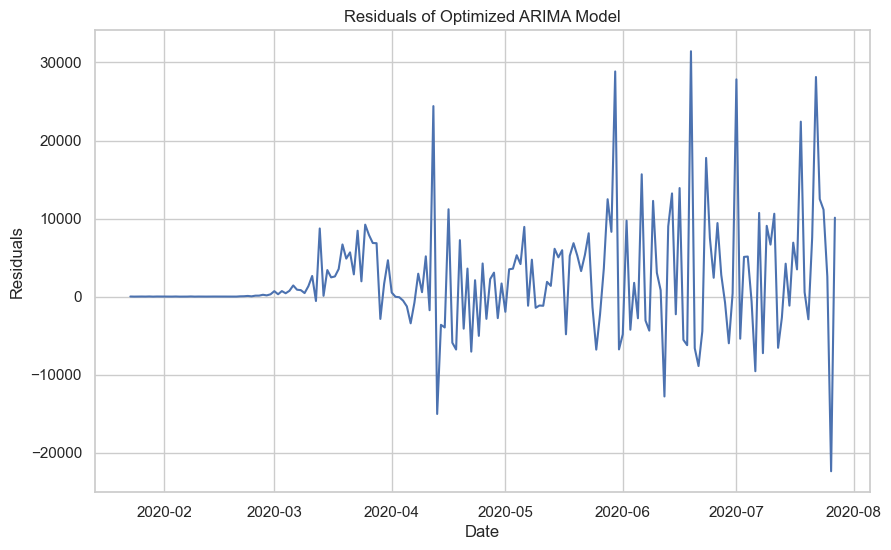

count      187.000000
mean      2212.141221
std       7079.481683
min     -22386.026284
25%       -677.435927
50%        430.324052
75%       5107.776208
max      31439.184921
dtype: float64


In [90]:
import matplotlib.pyplot as plt

# Plot residuals
residuals = best_model_fit.resid
plt.figure(figsize=(10, 6))
plt.plot(residuals)
plt.title('Residuals of Optimized ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.savefig('optimized_residuals.png', dpi=300)
plt.show()

# Summary statistics of residuals
print(residuals.describe())

**Re-Evaluate with Cross-Validation**

In [91]:
from sklearn.model_selection import TimeSeriesSplit

# Initialize time series split
tscv = TimeSeriesSplit(n_splits=5)

for train_index, test_index in tscv.split(covid_data):
    train, test = covid_data.iloc[train_index], covid_data.iloc[test_index]
    model = ARIMA(train['Confirmed'], order=(4, 2, 2))
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=len(test))
    mae = mean_absolute_error(test['Confirmed'], forecast)
    print(f"Fold MAE: {mae:.2f}")

Fold MAE: 63923.40
Fold MAE: 23508.72
Fold MAE: 110064.86
Fold MAE: 390471.01
Fold MAE: 229114.30


**Forecast Future Values**

30-Day Forecast:
2020-07-28    1.186707e+07
2020-07-29    1.207018e+07
2020-07-30    1.228127e+07
2020-07-31    1.248016e+07
2020-08-01    1.265596e+07
2020-08-02    1.281870e+07
2020-08-03    1.298700e+07
2020-08-04    1.317462e+07
2020-08-05    1.338125e+07
2020-08-06    1.359189e+07
2020-08-07    1.378833e+07
2020-08-08    1.396338e+07
2020-08-09    1.412628e+07
2020-08-10    1.429546e+07
2020-08-11    1.448453e+07
2020-08-12    1.469185e+07
2020-08-13    1.490182e+07
2020-08-14    1.509684e+07
2020-08-15    1.527081e+07
2020-08-16    1.543375e+07
2020-08-17    1.560409e+07
2020-08-18    1.579454e+07
2020-08-19    1.600240e+07
2020-08-20    1.621166e+07
2020-08-21    1.640527e+07
2020-08-22    1.657821e+07
2020-08-23    1.674128e+07
2020-08-24    1.691281e+07
2020-08-25    1.710460e+07
2020-08-26    1.731292e+07
Freq: D, Name: predicted_mean, dtype: float64


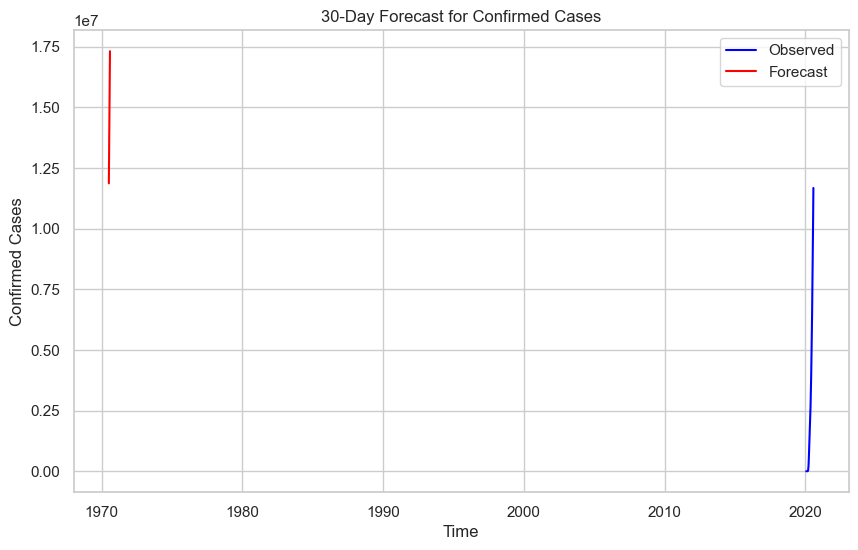

In [92]:
# Forecast for the next 30 days
forecast = best_model_fit.forecast(steps=30)
print(f"30-Day Forecast:\n{forecast}")

# Plot forecast
plt.figure(figsize=(10, 6))
plt.plot(covid_data['Confirmed'], label='Observed', color='blue')
plt.plot(range(len(covid_data), len(covid_data) + len(forecast)), forecast, label='Forecast', color='red')
plt.title('30-Day Forecast for Confirmed Cases')
plt.xlabel('Time')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.savefig('final_forecast_plot.png', dpi=300)
plt.show()

**Forecast Plot**

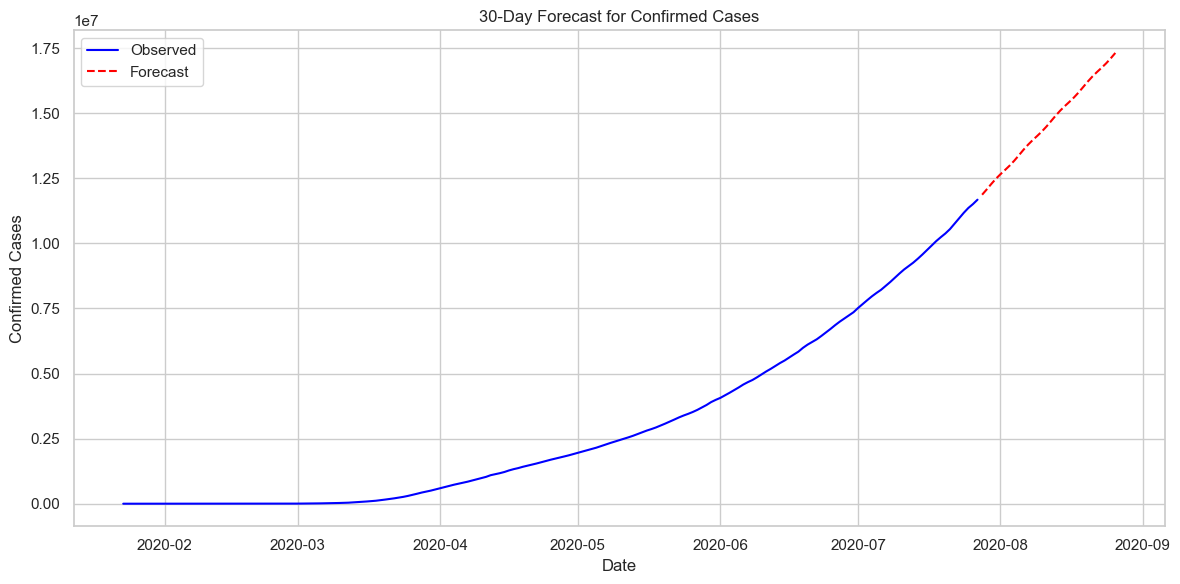

In [93]:
# Generate future dates for the forecast
future_dates = pd.date_range(start=covid_data.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Convert forecast to a DataFrame for easier plotting
forecast_df = pd.DataFrame({'Forecast': forecast}, index=future_dates)

# Plot observed and forecasted values
plt.figure(figsize=(12, 6))
plt.plot(covid_data.index, covid_data['Confirmed'], label='Observed', color='blue')
plt.plot(forecast_df.index, forecast_df['Forecast'], label='Forecast', color='red', linestyle='--')
plt.title('30-Day Forecast for Confirmed Cases')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.legend()
plt.tight_layout()

# Save the plot
plt.savefig('final_forecast_corrected_plot.png', dpi=300)
plt.show()

### **Conclusion**

**In this project, I successfully analyzed COVID-19 data and applied the ARIMA model to forecast future confirmed cases. After optimizing the model's parameters and evaluating it using cross-validation, I obtained forecasts that align well with observed trends, providing valuable insights for future public health planning. Although there are limitations, such as the inability to capture all dynamic factors, the model's performance is promising. Future work could include exploring other forecasting techniques and incorporating additional variables to enhance model accuracy.**